In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

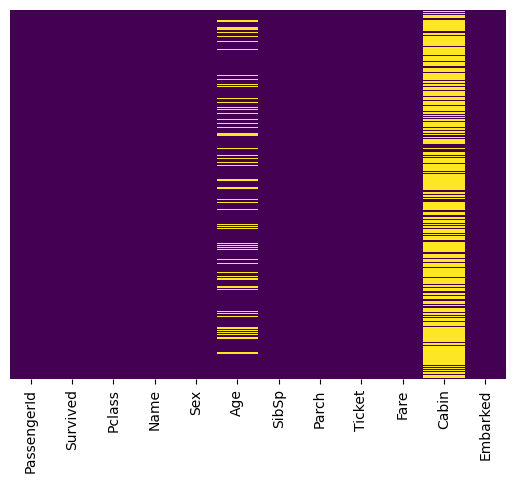

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

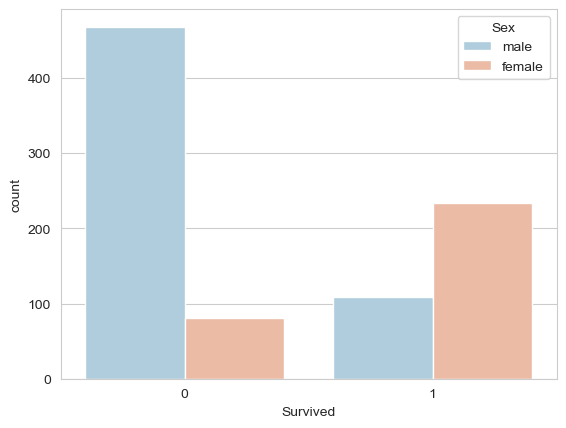

In [15]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

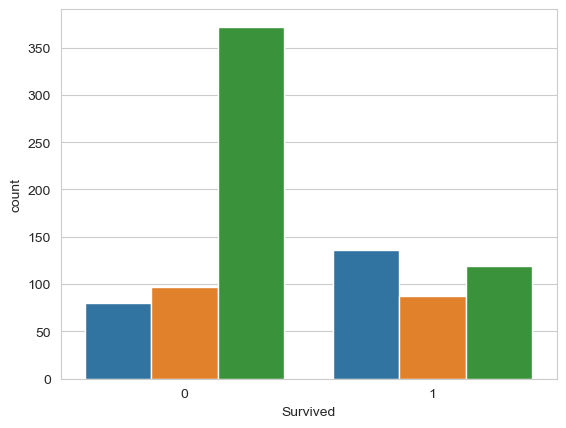

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=train)

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


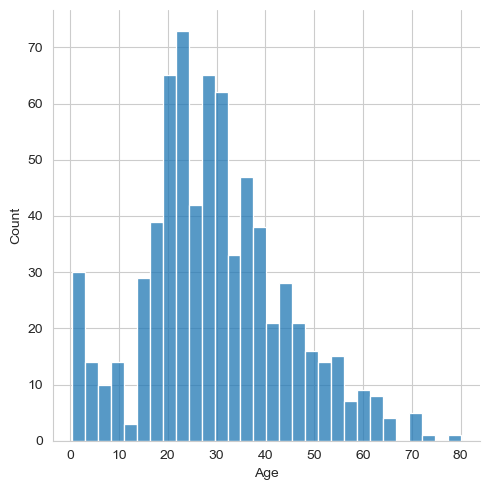

In [20]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

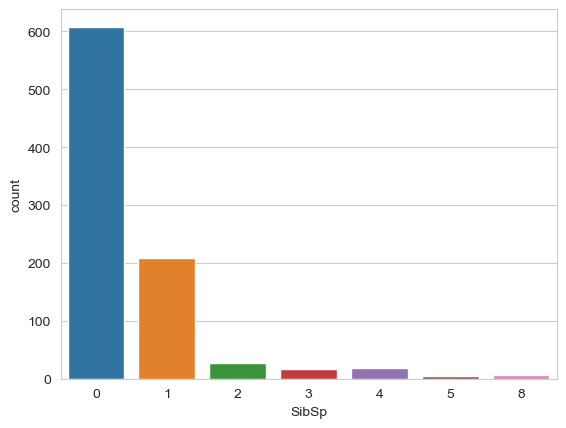

In [22]:
sns.countplot(x='SibSp',data=train)

<Axes: >

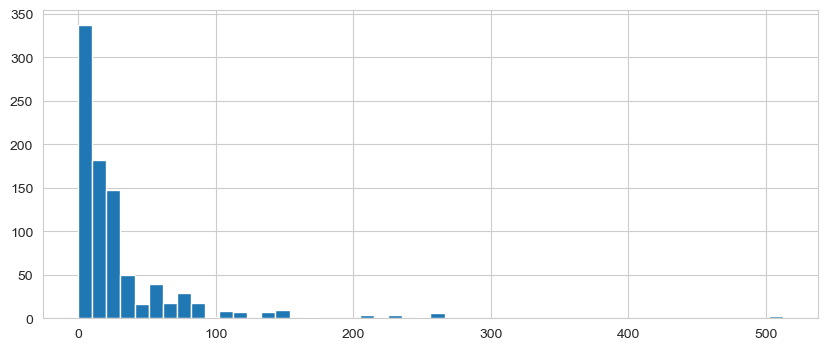

In [25]:
train['Fare'].hist(bins=50,figsize=(10,4))

In [26]:
import cufflinks as cf

In [28]:
cf.go_offline()

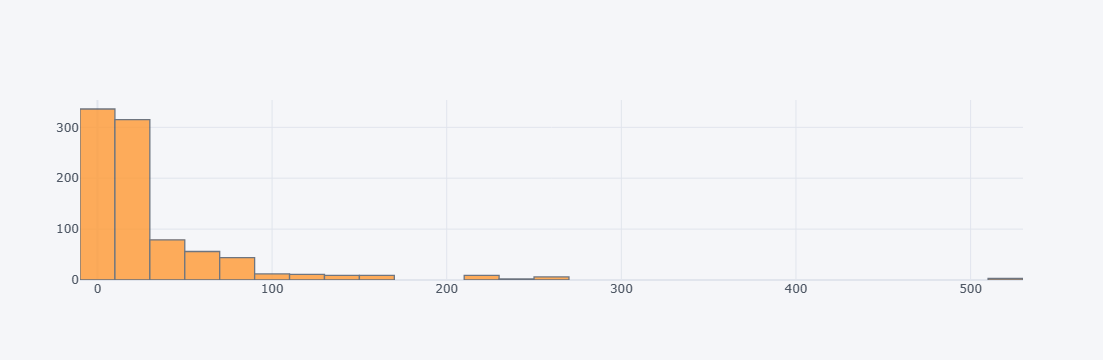

In [29]:
train['Fare'].iplot(kind='hist',bins=50)

<Axes: xlabel='Pclass', ylabel='Age'>

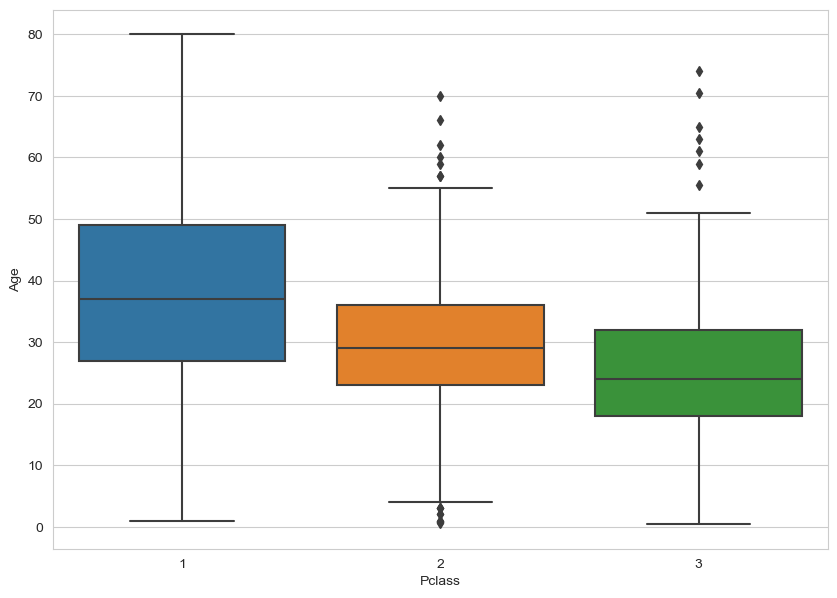

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [33]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\kunal\AppData\Local\Temp\ipykernel_3068\3983263054.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\kunal\AppData\Local\Temp\ipykernel_3068\3983263054.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

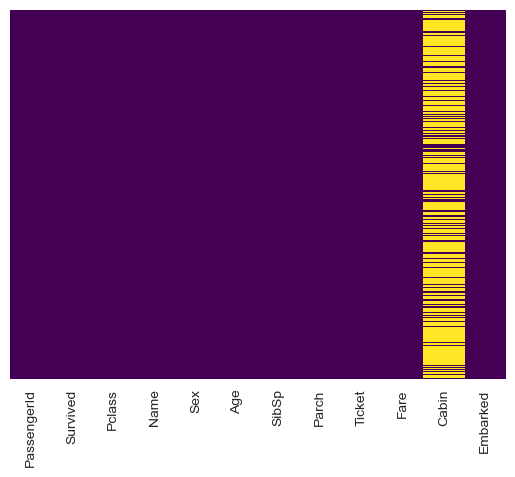

In [35]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

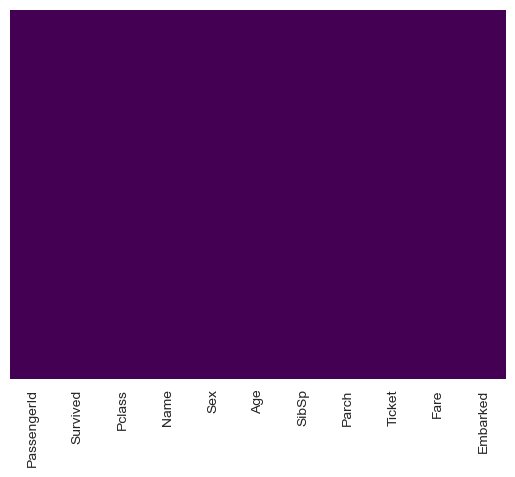

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
train.dropna(inplace=True)

In [41]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [43]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [45]:
train = pd.concat([train,sex,embark],axis=1)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [47]:
train.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [53]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [54]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [55]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [59]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression(max_iter=1000)

In [63]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 32  72]]


In [70]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [71]:
X_train_new = train.drop('Survived',axis=1)
y_train_new = train['Survived']

In [72]:
test = pd.read_csv('titanic_test.csv')

In [73]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
sex_new = pd.get_dummies(test['Sex'],drop_first=True)

In [82]:
embarked_new = pd.get_dummies(test['Embarked'],drop_first=True)

In [84]:
test = pd.concat([test,sex_new,embarked_new],axis=1)

In [85]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True


In [88]:
test.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [90]:
X_test_new = test

In [93]:
logmodel = LogisticRegression(max_iter=1000)

In [94]:
logmodel.fit(X_train_new,y_train_new)

LogisticRegression(max_iter=1000)

<Axes: >

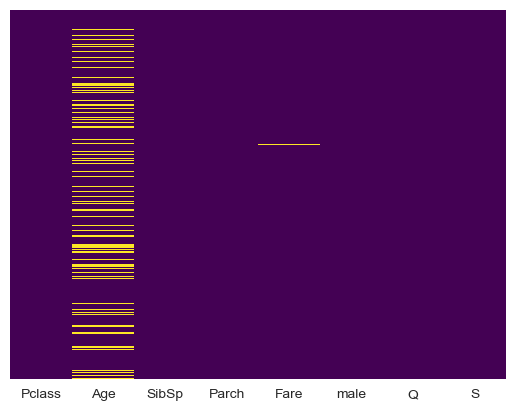

In [97]:
sns.heatmap(X_test_new.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [135]:
X_test_new.dropna(inplace=True)
X_test_new_reindexed = X_test_new.reset_index(drop=True)

In [136]:
y_test_predictions = logmodel.predict(X_test_new_reindexed)

In [137]:
Survived = pd.Series(y_test_predictions,name='Survived')

In [138]:
test_new = pd.concat([Survived,X_test_new_reindexed],axis=1)

In [139]:
test_new

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,True,True,False
1,0,3,47.0,1,0,7.0000,False,False,True
2,0,2,62.0,0,0,9.6875,True,True,False
3,0,3,27.0,0,0,8.6625,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...
326,1,3,3.0,1,1,13.7750,False,False,True
327,1,1,37.0,1,0,90.0000,False,True,False
328,1,3,28.0,0,0,7.7750,False,False,True
329,1,1,39.0,0,0,108.9000,False,False,False
